
<h3> Importing necessary libraries </h3>

In [1]:
import qlayers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

2023-04-26 18:26:34.882143: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1. <Quantum Keras Layer: func=qnode0>


<h3> Instantiating and visualizing the Moons dataset from Scikit-Learn </h3>

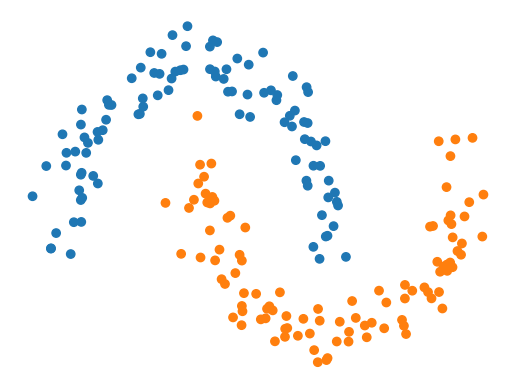

In [2]:
# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)

X, y = make_moons(n_samples=200, noise=0.1)
y_hot = tf.keras.utils.to_categorical(y, num_classes=2)  # one-hot encoded labels

c = ["#1f77b4" if y_ == 0 else "#ff7f0e" for y_ in y]  # colours for each class
plt.axis("off")
plt.scatter(X[:, 0], X[:, 1], c=c)
plt.show()

<h3> Creating model with classical and quantum layers </h3> 

In [3]:
tf.keras.backend.set_floatx('float64')

clayer_1 = tf.keras.layers.Dense(4)
qlayer_1 = qlayers.list_of_qlayers[0]
#qlayer_2 = qlayers.list_of_qlayers[1]
clayer_2 = tf.keras.layers.Dense(2, activation="softmax")

In [4]:
dir(qlayer_1)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_auto_get_config',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_build_input_shape',
 '_call_spec',
 '_callable_losses',
 '_captured_weight_regularizer',
 '_cast_single_input',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_compute_dtype',
 '_compute_dtype_object',
 '_dedup_weights',
 '_deferred_dependencies',
 '_delete_tracking',
 '_deserialization_dependencies',
 '_deserialize_from_proto',
 '_dtype',
 '_dtype_po

In [5]:
# construct the model
inputs = tf.keras.Input(shape=(2,))
x = clayer_1(inputs)
x_1, x_2 = tf.split(x, 2, axis=1)
x_1 = qlayer_1(x_1)
#x_2 = qlayer_2(x_2)
x = tf.concat([x_1, x_2], axis=1)
outputs = clayer_2(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

2023-04-26 18:34:58.214385: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
opt = tf.keras.optimizers.SGD(learning_rate=0.2)
model.compile(opt, loss="mae", metrics=["accuracy"])

fitting = model.fit(X, y_hot, epochs=6, batch_size=5, validation_split=0.25, verbose=1)

Epoch 1/6
30/30 [==============================] - 6s 189ms/step - loss: 0.3845 - accuracy: 0.7467 - val_loss: 0.2352 - val_accuracy: 0.8200
Epoch 2/6
30/30 [==============================] - 5s 173ms/step - loss: 0.1961 - accuracy: 0.8667 - val_loss: 0.1779 - val_accuracy: 0.8600
Epoch 3/6
30/30 [==============================] - 5s 168ms/step - loss: 0.1566 - accuracy: 0.8667 - val_loss: 0.1650 - val_accuracy: 0.8200
Epoch 4/6
30/30 [==============================] - 5s 166ms/step - loss: 0.1446 - accuracy: 0.8800 - val_loss: 0.1551 - val_accuracy: 0.8200
Epoch 5/6
30/30 [==============================] - 5s 168ms/step - loss: 0.1306 - accuracy: 0.9000 - val_loss: 0.1476 - val_accuracy: 0.8600
Epoch 6/6
30/30 [==============================] - 5s 164ms/step - loss: 0.1202 - accuracy: 0.8867 - val_loss: 0.1377 - val_accuracy: 0.8800


In [7]:
qlayer_1.get_weights()

[array([-0.77209267, -0.85460697,  0.30243328, -0.27668612])]

In [8]:
qlayer_2.get_weights()

NameError: name 'qlayer_2' is not defined

<h3> Result Plots </h3>

In [10]:
def plot_history(history, mode, model_number):
    if mode == "ACC":
        mode = 'accuracy'
    elif mode == "LOSS":
        mode = 'loss'
    else:
        print("ERROR")
        
    plt.plot(history.history[f"{mode}"])
    plt.plot(history.history[f"val_{mode}"])
    plt.title(f"model{model_number} {mode}")
    plt.ylabel(f'{mode}')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

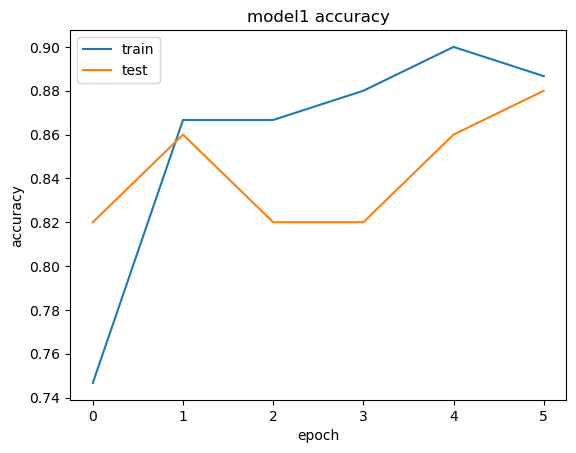

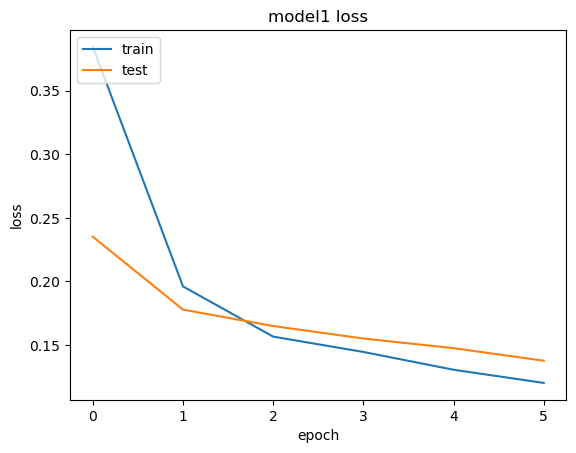

In [11]:
plot_history(fitting, "ACC", 1)
plot_history(fitting, "LOSS", 1)